In [21]:
import numpy as np 
import matplotlib.pyplot as plt     
import pandas as pd 
import seaborn as sns


In [22]:
df = pd.read_csv("./Data/charging_sessions.csv")

In [23]:
df.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [24]:
df.info()
# Abnormality: Column Unnamed: 0
# Todo: Remove column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [25]:
print(df.dtypes)


Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
userInputs           object
dtype: object


In [26]:
# List to store columns with mixed types
mixed_type_columns = []

for col in df.columns:
    # Only check columns with 'object' dtype
    if df[col].dtype == 'object':
        # Apply type() to each element in the column and get the number of unique types
        unique_types = df[col].apply(type).nunique()
        if unique_types > 1:
            # Get the unique types present in the column
            types_in_column = df[col].apply(type).unique()
            print(f"Column '{col}' has mixed types: {types_in_column}")
            mixed_type_columns.append(col)
# Abnormality: userInputs has mixxed types (Floats and strings)
# Todo: Change them to str (???: Maybe user inputs are meant to be mixxed)

Column 'doneChargingTime' has mixed types: [<class 'str'> <class 'float'>]
Column 'userInputs' has mixed types: [<class 'str'> <class 'float'>]


In [27]:
print(df.duplicated().sum())


0


In [28]:
df.isnull().any()
#Abnormality: The following columns have null values: doneChargingTime; userID; userInputs  

Unnamed: 0          False
id                  False
connectionTime      False
disconnectTime      False
doneChargingTime     True
kWhDelivered        False
sessionID           False
siteID              False
spaceID             False
stationID           False
timezone            False
userID               True
userInputs           True
dtype: bool

In [29]:
missing_data_summary = df.isnull().sum()
print(missing_data_summary)
#Abnormality: 4088 rows have doneChargingTime = NaN 
#Abnormality: 17263 rows have userID = NaN 
#Abnormality: 17263 rows have userInputs = NaN 

Unnamed: 0              0
id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4088
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17263
userInputs          17263
dtype: int64


In [30]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
66445    False
66446    False
66447    False
66448    False
66449    False
Length: 66450, dtype: bool

In [31]:
# Find entries with negative kwhDelivered
print(df[df['kWhDelivered'] < 0]),       


Empty DataFrame
Columns: [Unnamed: 0, id, connectionTime, disconnectTime, doneChargingTime, kWhDelivered, sessionID, siteID, spaceID, stationID, timezone, userID, userInputs]
Index: []


(None,)

In [32]:
# Attempt to convert each datetime column, temporarily storing the results
df['connectionTime_temp'] = pd.to_datetime(df['connectionTime'], errors='coerce')
df['disconnectTime_temp'] = pd.to_datetime(df['disconnectTime'], errors='coerce')
df['doneChargingTime_temp'] = pd.to_datetime(df['doneChargingTime'], errors='coerce')

# Identify rows where any of the conversions failed (NaT indicates conversion failure)
incompatible_datetime_entries = df[
    df['connectionTime_temp'].isna() |
    df['disconnectTime_temp'].isna() |
    df['doneChargingTime_temp'].isna()
]

# Display the incompatible rows for inspection
incompatible_datetime_entries[['connectionTime', 'disconnectTime', 'doneChargingTime']]

# 4088 rows identified, same amount as missing values


,connectionTime,disconnectTime,doneChargingTime
3756,2020-04-08 16:36:53+00:00,2020-04-09 03:43:29+00:00,NaN
3757,2020-04-09 13:23:52+00:00,2020-04-09 17:59:02+00:00,NaN
3758,2020-04-09 13:40:03+00:00,2020-04-09 21:43:22+00:00,NaN
3759,2020-04-09 14:01:53+00:00,2020-04-09 16:33:40+00:00,NaN
3760,2020-04-09 15:01:06+00:00,2020-04-09 23:38:08+00:00,NaN
...,...,...,...
60411,2019-03-30 00:32:10+00:00,2019-03-30 02:23:14+00:00,NaN
61097,2019-04-14 16:19:12+00:00,2019-04-14 20:38:39+00:00,NaN
61103,2019-04-15 13:00:59+00:00,2019-04-15 13:55:25+00:00,NaN
61117,2019-04-15 13:52:45+00:00,2019-04-15 14:47:01+00:00,NaN


# Visualization 

In [33]:
#connectionTime and disconnectTime
#doneChargingTime
#kWhDelivered
#WhPerMileb


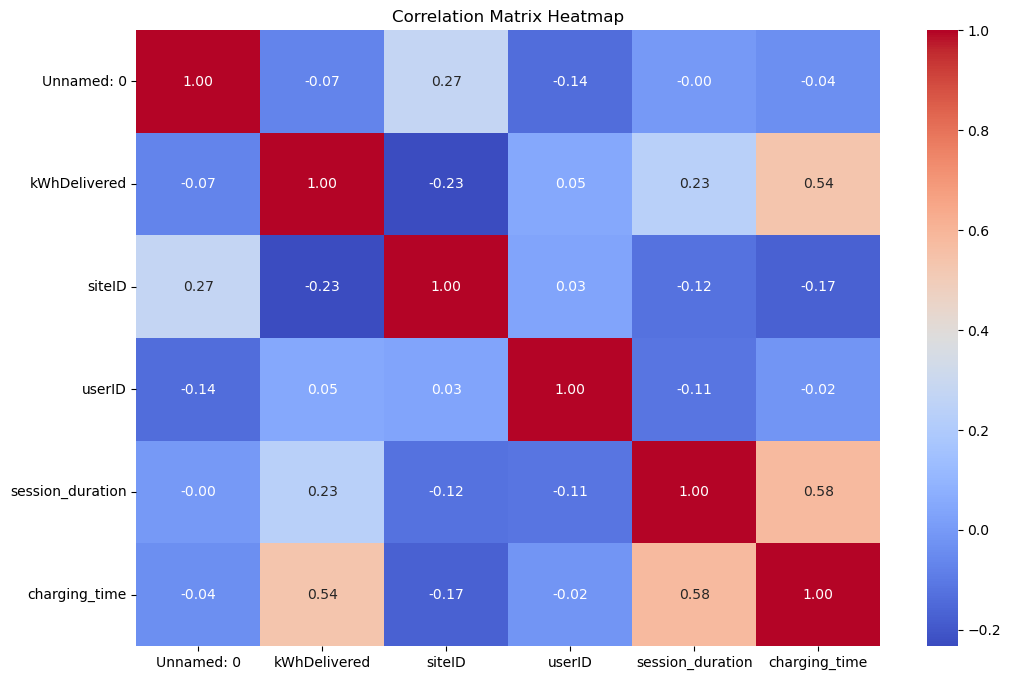

In [ ]:
# Corr. matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()
# Finding: charging time has the largest "impact" on kWhDelivered

In [34]:
# Total Session Session Duration 
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'])
df['connectionTime'] = pd.to_datetime(df['connectionTime'])
df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'])

df['session_duration'] = (df['disconnectTime'] - df['connectionTime']).dt.total_seconds() / 60
df['charging_time'] = (df['doneChargingTime'] - df['connectionTime']).dt.total_seconds() / 60

In [35]:
session_duration_stats = {
    'mean': df['session_duration'].mean(),
    'median': df['session_duration'].median(),
    'standard_deviation': df['session_duration'].std(),
    'min': df['session_duration'].min(),
    'max': df['session_duration'].max(),
    '25th_percentile': df['session_duration'].quantile(0.25),
    '75th_percentile': df['session_duration'].quantile(0.75)
}

session_duration_stats

{'mean': np.float64(377.5763034863306),
 'median': np.float64(371.73333333333335),
 'standard_deviation': np.float64(291.6898552352364),
 'min': np.float64(2.066666666666667),
 'max': np.float64(14716.15),
 '25th_percentile': np.float64(171.96249999999998),
 '75th_percentile': np.float64(553.525)}

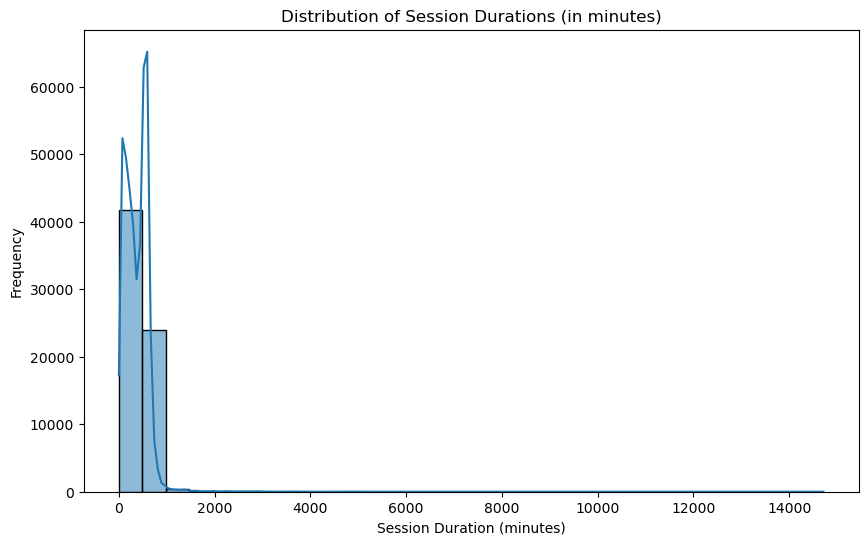

In [36]:
# Effective Charging time 
# Plot histogram of session durations
plt.figure(figsize=(10, 6))
sns.histplot(df['session_duration'], bins=30, kde=True)
plt.title("Distribution of Session Durations (in minutes)")
plt.xlabel("Session Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


In [37]:
# Find entries with negative session_duration
print(df[df['session_duration'] < 0]),

Empty DataFrame
Columns: [Unnamed: 0, id, connectionTime, disconnectTime, doneChargingTime, kWhDelivered, sessionID, siteID, spaceID, stationID, timezone, userID, userInputs, connectionTime_temp, disconnectTime_temp, doneChargingTime_temp, session_duration, charging_time]
Index: []


(None,)

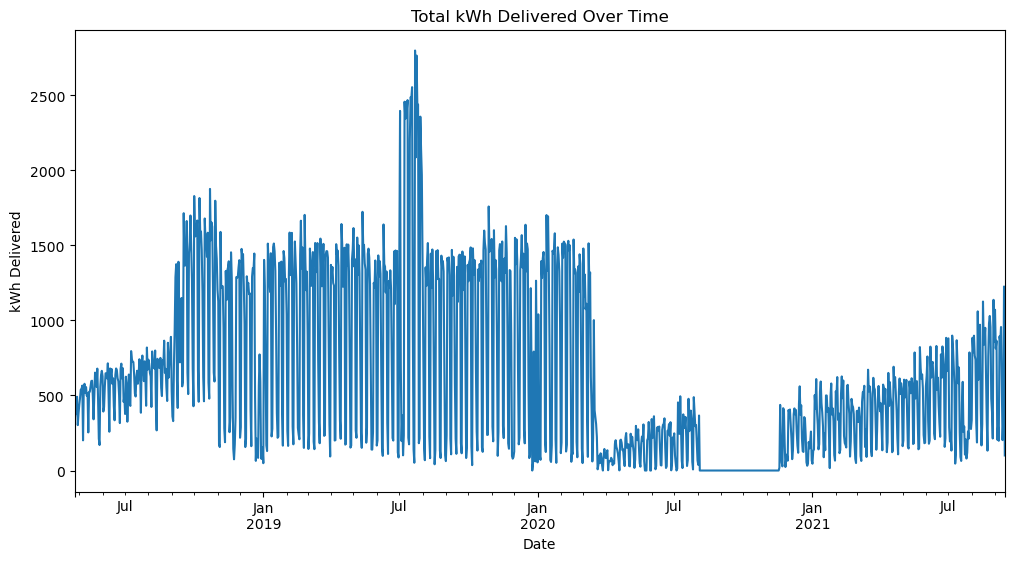

In [38]:
# kWh deilvered 
plt.figure(figsize=(12, 6))
df.set_index('connectionTime').resample('D')['kWhDelivered'].sum().plot()
plt.title("Total kWh Delivered Over Time")
plt.xlabel("Date")
plt.ylabel("kWh Delivered")
plt.show()